In [7]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [8]:
# 차원 축소 : 차원 : 특성 갯수
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [9]:
pca.components_.shape

(50, 10000)

In [10]:
# 10행 10열로 과일 이미지를 출력하는 함수 
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1): # arr : 과일 이미지 데이터 배열, ratio : 확대 비율
    # 총 샘플의 갯수 
    total = len(arr)
    # 총 행수
    rows = int(np.ceil(total / 10)) 

    # 한 행당 열의 갯수 
    cols = total if rows < 2 else 10 # 1행일때는 전체 갯수, 그 이상일때는 10개로 열 갯수 고정

    _, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio))

    for i in range(rows):
        for j in range(cols):
            cur = i * 10 + j
            if  cur < total:
                axs[i, j].imshow(arr[cur], cmap='gray_r')
            
            axs[i,j].axis('off')
    plt.show()

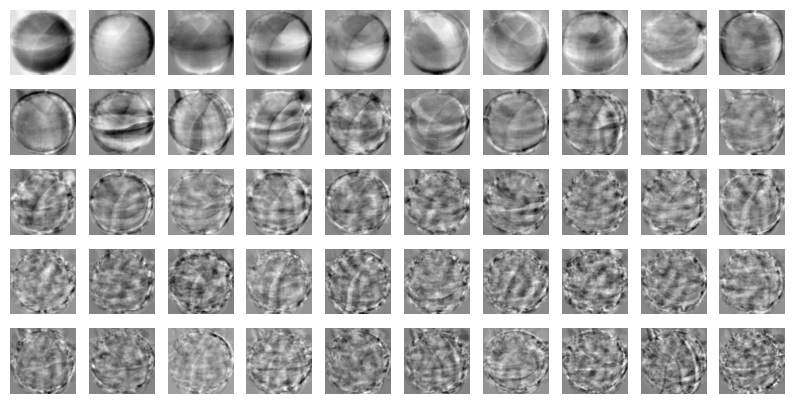

In [ ]:

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [14]:
fruits_2d.shape

(300, 10000)

In [ ]:
fruits_pca = pca.transform(fruits_2d) # 10000 차원 -> 50 차원
fruits_pca.shape

(300, 50)

In [18]:
# 원본 데이터로 복구 - pca.inverse_transform(..) : 50 차원 -> 10000차원
fruits_inverse = pca.inverse_transform(fruits_pca)

In [21]:
# 설명된 분산, 주성분이 원본 데이터를 얼마만큼 설명할 수 있는 지(복구 가능 비율)
# pca.explained_variance_ratio_
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215120246076081)

In [22]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486383, 0.00480347,
       0.00447835, 0.00437316, 0.00408018, 0.00389458, 0.00372412,
       0.00359275, 0.00331437, 0.00317792, 0.00304344, 0.00303753,
       0.00288916, 0.00275785, 0.00264813, 0.00255586, 0.00252134,
       0.00246845, 0.00239452, 0.00230478, 0.00222083, 0.00215452,
       0.00213713, 0.00196148, 0.00193172, 0.00190734, 0.00185431,
       0.00181815, 0.00173921, 0.00169422, 0.00162714, 0.00154919])

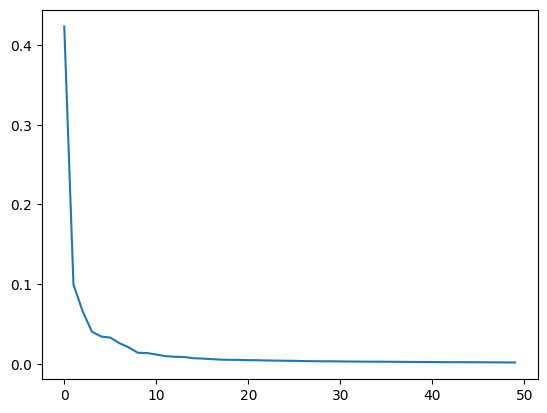

In [23]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [24]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [26]:
lr = LogisticRegression()
cv = cross_validate(lr, fruits_2d, target)
print("걸린시간: ", np.mean(cv['fit_time']))
print("정확도: ", np.mean(cv['test_score']))

걸린시간:  0.21552667617797852
정확도:  0.9966666666666667


In [29]:
lr = LogisticRegression()
cv = cross_validate(lr, fruits_pca, target) # 50개로 차원 축소한 데이터
print("걸린시간: ", np.mean(cv['fit_time']))
print("정확도: ", np.mean(cv['test_score']))

걸린시간:  0.007926464080810547
정확도:  0.9966666666666667


In [31]:
# n_componets = 0~1 미만 값 ,설명된 분산 비율

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.components_.shape

(2, 10000)

In [32]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [33]:
lr = LogisticRegression(max_iter=150)
cv = cross_validate(lr, fruits_pca, target) # 2개로 차원 축소한 데이터
print("걸린시간: ", np.mean(cv['fit_time']))
print("정확도: ", np.mean(cv['test_score']))

걸린시간:  0.01866006851196289
정확도:  0.9966666666666667


In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [35]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

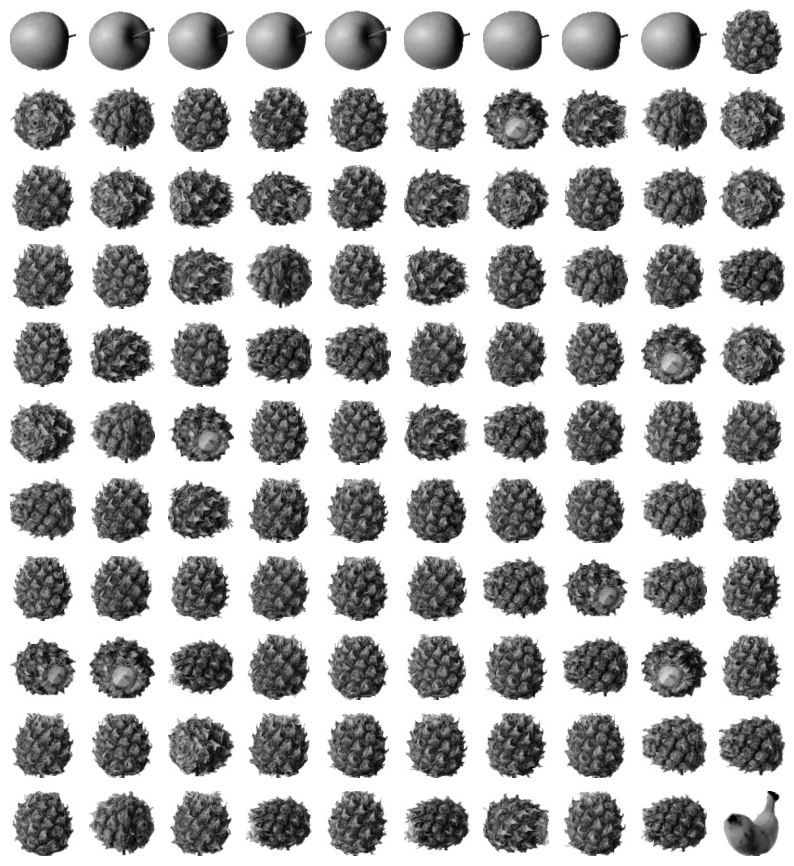

In [36]:
draw_fruits(fruits[km.labels_ == 0])

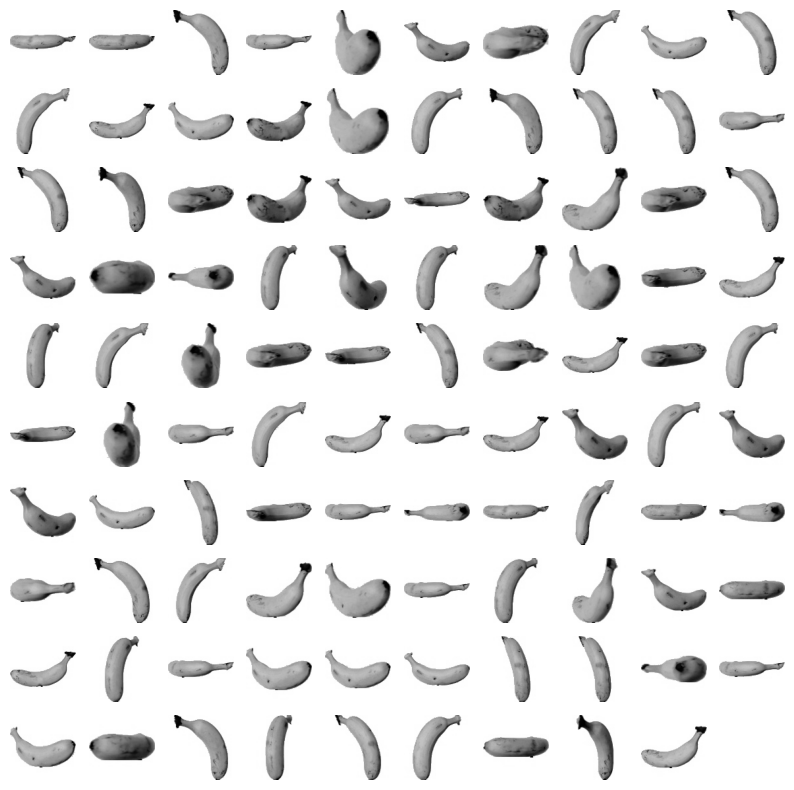

In [37]:
draw_fruits(fruits[km.labels_ == 1])

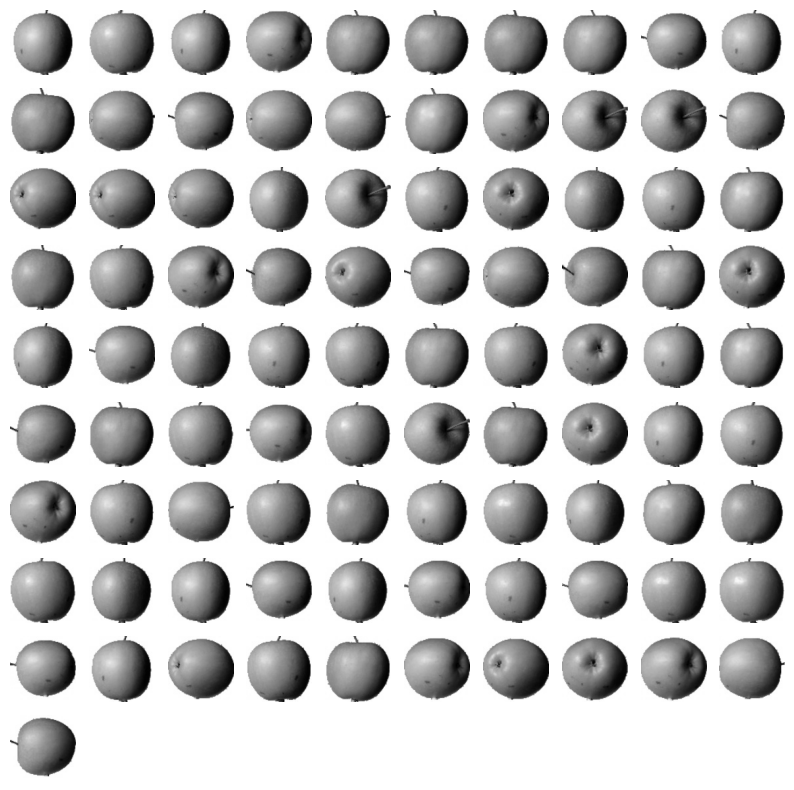

In [38]:
draw_fruits(fruits[km.labels_ == 2])

In [39]:
fruits_pca[:5]

array([[2778.41779459, 1571.87380954],
       [3078.27365136, 2739.27040962],
       [2620.61072939, 1486.87055253],
       [3113.71771062, 2530.02283015],
       [2520.64705144, 2330.64791173]])

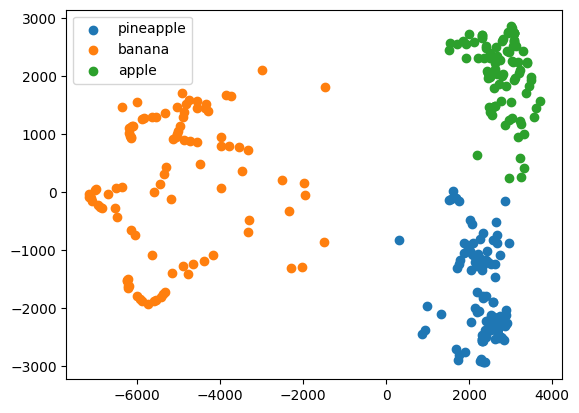

In [40]:
for label in range(3): # 0,1,2
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()